<a href="https://colab.research.google.com/github/GGomezMorales/pae-python-control/blob/course-classes/1_Diagramas_de_bloques_y_funci%C3%B3n_de_transferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diagramas de bloques y función de transferencia**

## **Librerías necesarias**

El módulo de control es un conjunto de liberías y funciones enfocadas a las operaciones comúnes para el análisis y diseño de los sistemas de control de realimentación. 
Para más detalles consultar: https://python-control.readthedocs.io/en/0.9.3.post2/intro.html

In [ ]:
# Instalamos la librería de control
!pip install control

In [ ]:
# Importamos las funciones necesarias del módulo de control y matplotlib
import control
from control.matlab import *
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## **Ejemplos**


> ¿Cómo definir una función de transferencia en Python?


In [ ]:
# Importamos los métodos control.matlab
from control.matlab import *

sys = tf(2, [1, 2, 1])
print(sys)


      2
-------------
s^2 + 2 s + 1





> A continuación vamos a desarrollar un ejemplo. El objetivo del ejemplo es simplificar el diagrama usando los comandos **series**, **parallel** y **feedback**.


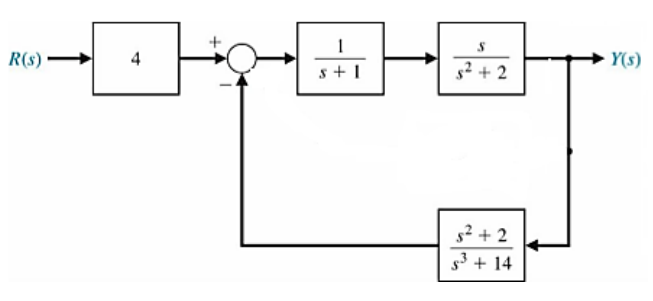

In [ ]:
# Definimos las funciones de transferencia de cada uno de los bloques 
k = 4
G1 = tf(1,[1,1])
G2 = tf([1,0],[1,0,2])
H = tf([1,0,2],[1,0,0,14])

# Hacemos las operaciones usando las funciones series, parallel y feedback
G3 = series(G1,G2);
G4 = feedback(G3,H)
G5 = series(k,G4);

# Imprimir
print(G5)


                 4 s^4 + 56 s
-----------------------------------------------
s^6 + s^5 + 2 s^4 + 17 s^3 + 14 s^2 + 30 s + 28




> Funciones de transferencia definiendo los ceros, polos y ganancia



In [ ]:
# Definimos los ceros, polos y ganancia
ceros = [0, 0]; polos = [-1, -2]; ganancia = 1 

# Creamos la función de transferencia zpk con los parámetros anteriores
sys_zpk = zpk(ceros, polos, ganancia) 
print(sys_zpk)


     s^2
-------------
s^2 + 3 s + 2





> ¿Cómo graficar la respuesta al escalón de una función de transferencia?




    s + 2
-------------
s^2 + 2 s + 3



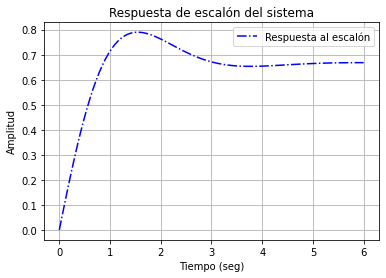

+------------------+--------------------+
|    Parámetros    |      Valores       |
+------------------+--------------------+
|     RiseTime     | 0.6977530584830441 |
|   SettlingTime   | 3.8376418216567423 |
|   SettlingMin    | 0.6190770690636658 |
|   SettlingMax    | 0.7896857951050988 |
|    Overshoot     | 18.452869265764832 |
|    Undershoot    |         0          |
|       Peak       | 0.7896857951050988 |
|     PeakTime     | 1.535056728662697  |
| SteadyStateValue | 0.6666666666666666 |
+------------------+--------------------+


In [ ]:
# Definir la función de transferencia
sys = tf([1, 2], [1, 2, 3])
print(sys)

# Simular la respuesta de escalón de una función de transferencia
y, T = step(sys, T=6)

# Graficar la respuesta de escalón
plt.figure()
plt.plot(T, y,'b-.'); plt.xlabel('Tiempo (seg)'); plt.ylabel('Amplitud'); plt.legend(['Respuesta al escalón'])
plt.title('Respuesta de escalón del sistema'); plt.grid(); plt.show()

# Información de la gráfica:
info = stepinfo(sys)
tabla_info = PrettyTable()                           # Definimos una tabla
tabla_info.field_names = ["Parámetros", "Valores"]   # Nombres de las columnas

for key, value in info.items():
  tabla_info.add_row([key, value])
print(tabla_info)